<h1 align='center'>Table of Contents </h1>
<ol>
    <li>Project Purpose and Goals</li>
    <li><a href='#data-set-q'>Data Set Question Outline</a></li>
        <ol>
            <li>Demographic</li>
            <li>Medical Condition</li>
            <li>Financial</li>
            <li>Medical Staff</li>
            <li>Insurance and Payments</li>
            <li>Overall Analysis</li>
        </ol>
    <li><a href='#data'>Data</a></li>
        <ol>
            <li><a href='#data-cleaning'>Data Cleaning</a></li>
        </ol>
    <li><a href='#exploratory-analysis'>Exploratory Analysis</a></li>
    <li><a href='#descriptive-analysis'>Descriptive Analysis / Question Answers</a></li>
</ol>

## Project Purpose and Overall Goals
Overall I want to be able to form a systematic way to approach analysis.
Practicing graphing with matplot and seaborn.
I want to be able to practice my dashboarding as well using Tableau Public.

---

<a id='data-set-q'></a>
## Data Set Questions
I am going to be looking at different parts of this data set and and making so questions and finding answers to those questions. Each section will be outlined below, along with the links to the cells with the answers.

### <u>Demographic<u>
- What is the average age of the patients?
- What is the gender distribution of the patients?
- What is the distribution of blood types among patients?
- How does the age distribution change depending on medical condition?

### <u>Medical Condition<u>
- Which medical condition has the highest average billing amount?
- What is the average length of hospital stays for different medical conditions?
- What is the most common medication given for each medical condition?
- What is the relationship between medical condition and test results?

### <u>Financial<u>
- What is the total billing amount by hospital?
- What is the distribution of billing amounts for urgent versus elective admissions?
- Is there a correlation between age and billing amount?
- Which insurance provider has the highest average billing amount?

### <u>Medical Staff<u>
- Which doctor has treated the most patients?
- What is the average length of stay at each hospital?
- Which hospital has the highest number of urgent admissions?
- What is the average billing amount per doctor?

### <u>Insurance and Payments<u>
- How does billing vary by insurance provider?
- What is the total billing amount for each insurance provider?
    
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='data'></a>
## Data

This is healthcare data from Kaggle meant to represent real world data for testing and analysis.

In [2]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


<a id='data-cleaning'></a>
## Data Cleaning

I will be going through the data to see if there is any missing data. Depending on the data missing or null, I will decide whether to remove it or to fill it in with other relavent data.

In [3]:
# cleaning columns and inconsistent naming
df['Name'] = df['Name'].str.title()
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
# Finding if there are any null values
df1 = df[df.isna().any(axis = 1)]
df1

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


In [5]:
# Seeing if the data is consistent
df.groupby(['Insurance Provider', 'Medical Condition']).count() 
# If the data has different values then there would be -
# Indication of data missing or null - another check for the function above

Name   Age  Gender  Blood Type  \
Insurance Provider Medical Condition                                   
Aetna              Arthritis          1832  1832    1832        1832   
                   Asthma             1740  1740    1740        1740   
                   Cancer             1819  1819    1819        1819   
                   Diabetes           1842  1842    1842        1842   
                   Hypertension       1876  1876    1876        1876   
                   Obesity            1804  1804    1804        1804   
Blue Cross         Arthritis          1852  1852    1852        1852   
                   Asthma             1835  1835    1835        1835   
                   Cancer             1808  1808    1808        1808   
                   Diabetes           1860  1860    1860        1860   
                   Hypertension       1813  1813    1813        1813   
                   Obesity            1891  1891    1891        1891   
Cigna              Arthritis          1900  1900    1900        1900   
                   Asthma             1907  1907    1907        1907   
                   Cancer             1864  1864    1864        1864   
                   Diabetes           1893  1893    1893        1893   
                   Hypertension       1821  1821    1821        1821   
                   Obesity            1864  1864    1864        1864   
Medicare           Arthritis          1851  1851    1851        1851   
                   Asthma             1833  1833    1833        1833   
                   Cancer             1866  1866    1866        1866   
                   Diabetes           1903  1903    1903        1903   
                   Hypertension       1847  1847    1847        1847   
                   Obesity            1854  1854    1854        1854   
UnitedHealthcare   Arthritis          1873  1873    1873        1873   
                   Asthma             1870  1870    1870        1870   
                   Cancer             1870  1870    1870        1870   
                   Diabetes           1806  1806    1806        1806   
                   Hypertension       1888  1888    1888        1888   
                   Obesity            1818  1818    1818        1818   

                                      Date of Admission  Doctor  Hospital  \
Insurance Provider Medical Condition                                        
Aetna              Arthritis                       1832    1832      1832   
                   Asthma                          1740    1740      1740   
                   Cancer                          1819    1819      1819   
                   Diabetes                        1842    1842      1842   
                   Hypertension                    1876    1876      1876   
                   Obesity                         1804    1804      1804   
Blue Cross         Arthritis                       1852    1852      1852   
                   Asthma                          1835    1835      1835   
                   Cancer                          1808    1808      1808   
                   Diabetes                        1860    1860      1860   
                   Hypertension                    1813    1813      1813   
                   Obesity                         1891    1891      1891   
Cigna              Arthritis                       1900    1900      1900   
                   Asthma                          1907    1907      1907   
                   Cancer                          1864    1864      1864   
                   Diabetes                        1893    1893      1893   
                   Hypertension                    1821    1821      1821   
                   Obesity                         1864    1864      1864   
Medicare           Arthritis                       1851    1851      1851   
                   Asthma                          1833    1833      1833   
                   Cancer              

In [6]:
df.groupby(['Blood Type', 'Gender']).count() # Same check as above

Name   Age  Medical Condition  Date of Admission  Doctor  \
Blood Type Gender                                                             
A+         Female  3564  3564               3564               3564    3564   
           Male    3392  3392               3392               3392    3392   
A-         Female  3449  3449               3449               3449    3449   
           Male    3520  3520               3520               3520    3520   
AB+        Female  3438  3438               3438               3438    3438   
           Male    3509  3509               3509               3509    3509   
AB-        Female  3461  3461               3461               3461    3461   
           Male    3484  3484               3484               3484    3484   
B+         Female  3377  3377               3377               3377    3377   
           Male    3568  3568               3568               3568    3568   
B-         Female  3461  3461               3461               3461    3461   
           Male    3483  3483               3483               3483    3483   
O+         Female  3464  3464               3464               3464    3464   
           Male    3453  3453               3453               3453    3453   
O-         Female  3512  3512               3512               3512    3512   
           Male    3365  3365               3365               3365    3365   

                   Hospital  Insurance Provider  Billing Amount  Room Number  \
Blood Type Gender                                                              
A+         Female      3564                3564            3564         3564   
           Male        3392                3392            3392         3392   
A-         Female      3449                3449            3449         3449   
           Male        3520                3520            3520         3520   
AB+        Female      3438                3438            3438         3438   
           Male        3509                3509            3509         3509   
AB-        Female      3461                3461            3461         3461   
           Male        3484                3484            3484         3484   
B+         Female      3377                3377            3377         3377   
           Male        3568                3568            3568         3568   
B-         Female      3461                3461            3461         3461   
           Male        3483                3483            3483         3483   
O+         Female      3464                3464            3464         3464   
           Male        3453                3453            3453         3453   
O-         Female      3512                3512            3512         3512   
           Male        3365                3365            3365         3365   

                   Admission Type  Discharge Date  Medication  Test Results  
Blood Type Gender                                                            
A+         Female            3564            3564        3564          3564  
           Male              3392            3392        3392          3392  
A-         Female            3449            3449        3449          3449  
           Male              3520            3520        3520          3520  
AB+        Female            3438            3438        3438          3438  
           Male              3509            3509        3509          3509  
AB-        Female            3461            3461        3461          3461  
           Male              3484            3484        3484          3484  
B+         Female            3377            3377        3377          3377  
           Male              3568            3568        3568          3568  
B-         Female            3461            3461        3461          3461  
           Male              3483            3483        3483          3483  
O+         Female            3464            3464        3464  

<AxesSubplot:ylabel='Billing Amount'>

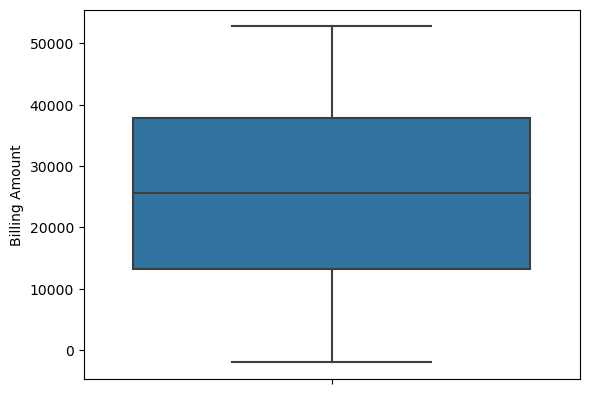

In [7]:
# Looking for outliers in the data, although I most likely not be doing anything to the data because since this data set
# isn't actually real I am not going to opt to remove any of the data but will leave the method to remove them.

sns.boxplot(data = df, y = 'Billing Amount')

<a id='exploratory-analysis'></a>
## Exploratory Analysis
This phase of analysis is for us to get more familiar with the data that we are working with. Here we want to be able to see what the averages, and means that we have. Histograms are great ways to visualize the data.

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


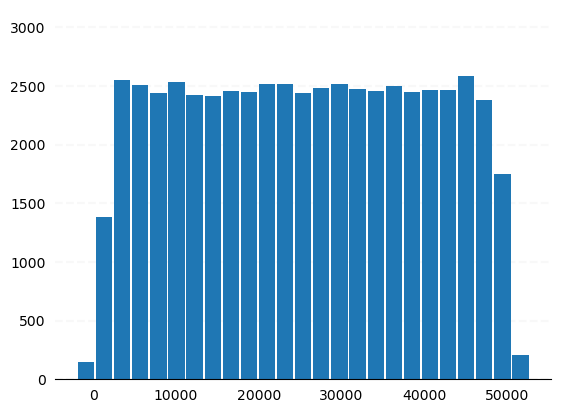

In [9]:
# Using a histogram on various numerical pieces of data to see how it is all orgranized
ax = df['Billing Amount'].hist(bins=25, grid=False, zorder=2, rwidth=0.9)
# Removes the edges of the chart
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# Removes the ticks from the sides of the chart
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
# Creates horizontal lines across background
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

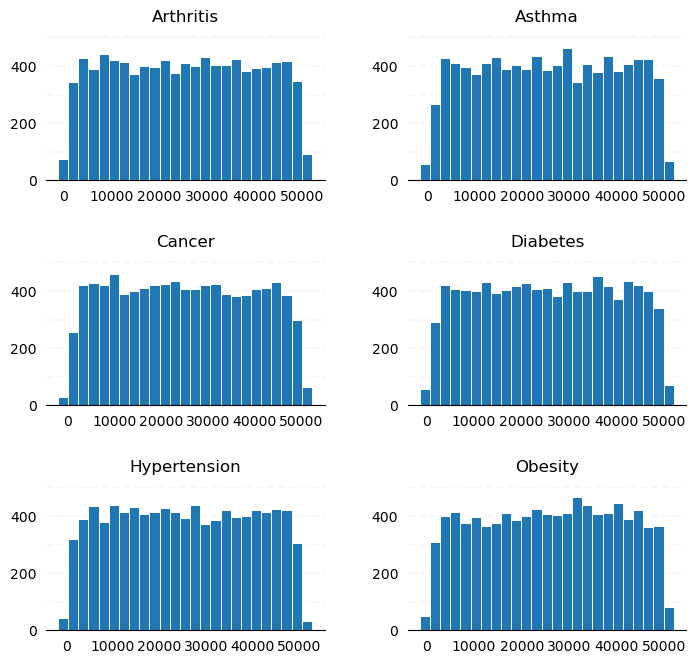

In [10]:
# This is a quick glimpse on how the data is spread based on billing cost per medical condition.

# Using a histogram on various numerical pieces of data to see how it is all orgranized
axes = df['Billing Amount'].hist(by=df['Medical Condition'], bins=25, grid=False, zorder=2, rwidth=0.9, xrot=0, figsize=(8,8))

for ax in axes.flatten():
    # Removes the edges of the chart
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Removes the ticks from the sides of the chart
    ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # Creates horizontal lines across background
    vals = ax.get_yticks()
    for tick in vals:
        ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [11]:
df_medical = df['Medical Condition'].astype('category').cat.codes
correlation = df['Billing Amount'].corr(df_medical)
print(f"The correlation between A and B is {correlation}")

The correlation between A and B is 0.005511555444107219


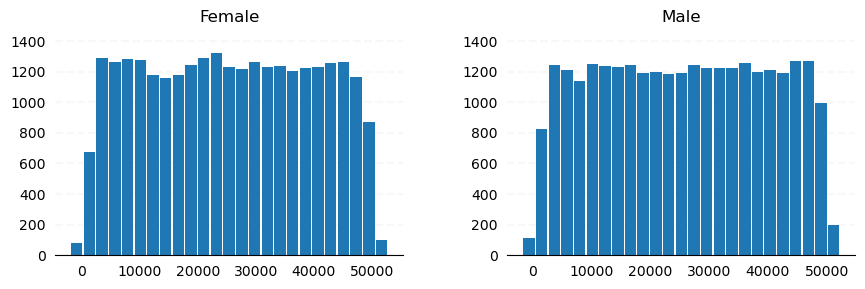

In [12]:
# Wanted to see the distribution for gender as a possible reason for medical cost prices.

# Using a histogram on various numerical pieces of data to see how it is all orgranized
axes = df['Billing Amount'].hist(by=df['Gender'], bins=25, grid=False, zorder=2, rwidth=0.9, xrot=0, figsize=(10,3))

for ax in axes.flatten():
    # Removes the edges of the chart
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Removes the ticks from the sides of the chart
    ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # Creates horizontal lines across background
    vals = ax.get_yticks()
    for tick in vals:
        ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [13]:
df_gender = df['Gender'].astype('category').cat.codes
correlation = df['Billing Amount'].corr(df_gender)
print(f"The correlation between A and B is {correlation}")

The correlation between A and B is 0.00482740167928562


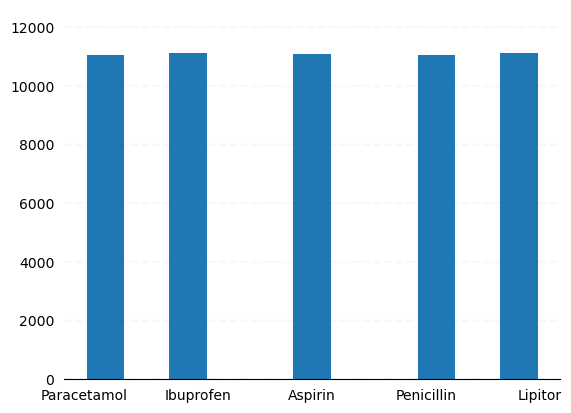

In [14]:
ax = df['Medication'].hist(bins=11, grid=False, zorder=2, rwidth=0.9)
# Removes the edges of the chart
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# Removes the ticks from the sides of the chart
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
# Creates horizontal lines across background
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

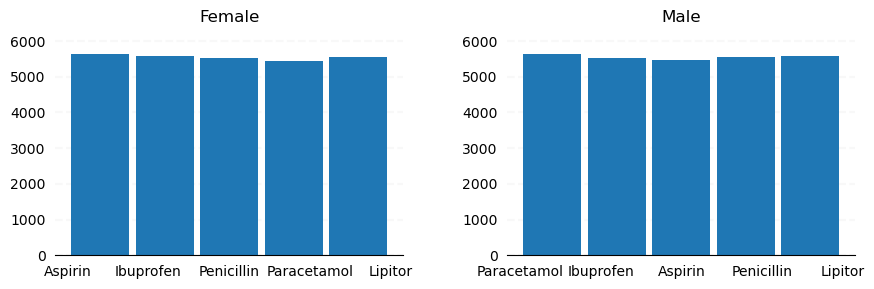

In [15]:
# Using a histogram on various numerical pieces of data to see how it is all orgranized
axes = df['Medication'].hist(by=df['Gender'], bins=5, grid=False, zorder=2, rwidth=0.9, xrot=0, figsize=(10,3))

for ax in axes.flatten():
    # Removes the edges of the chart
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Removes the ticks from the sides of the chart
    ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # Creates horizontal lines across background
    vals = ax.get_yticks()
    for tick in vals:
        ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [16]:
df_gender = df['Gender'].astype('category').cat.codes
df_medication = df['Medication'].astype('category').cat.codes
correlation = df_medication.corr(df_gender)
print(f"The correlation between A and B is {correlation}")

The correlation between A and B is 0.0075234117476448365


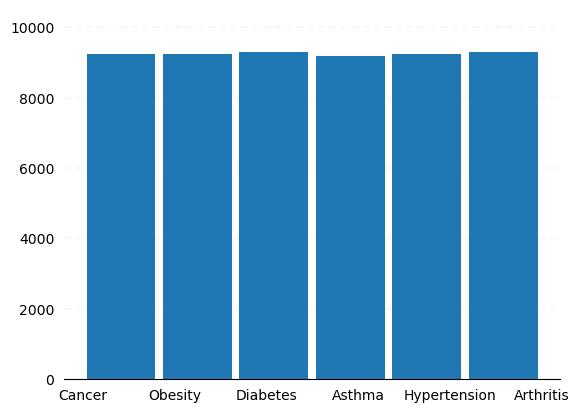

In [17]:
# Using a histogram on various numerical pieces of data to see how it is all orgranized
ax = df['Medical Condition'].hist(bins=6, grid=False, zorder=2, rwidth=0.9)
# Removes the edges of the chart
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# Removes the ticks from the sides of the chart
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
# Creates horizontal lines across background
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

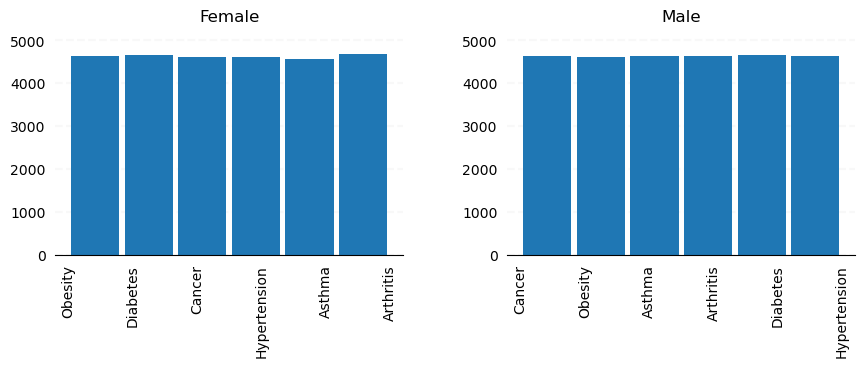

In [18]:
# Using a histogram on various numerical pieces of data to see how it is all orgranized
axes = df['Medical Condition'].hist(by=df['Gender'], bins=6, grid=False, zorder=2, rwidth=0.9, xrot=90, figsize=(10,3))

for ax in axes.flatten():
    # Removes the edges of the chart
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Removes the ticks from the sides of the chart
    ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # Creates horizontal lines across background
    vals = ax.get_yticks()
    for tick in vals:
        ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [19]:
df_gender = df['Gender'].astype('category').cat.codes
df_medical_cond = df['Medical Condition'].astype('category').cat.codes
correlation = df_medical_cond.corr(df_gender)
print(f"The correlation between A and B is {correlation}")

The correlation between A and B is 0.00031700026748559244


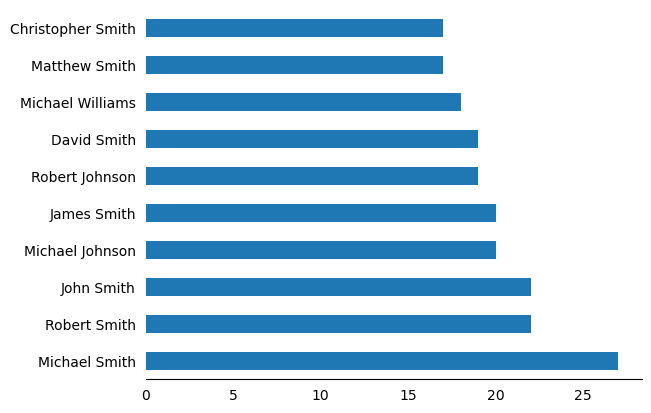

In [20]:
# Top 10 Doctors that saw the most patients
ax = df['Doctor'].value_counts()[:10].plot(kind='barh')

# Removes the edges of the chart
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# Removes the ticks from the sides of the chart
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)

<a id='descriptive-analysis'></a>

---

### Descriptive Analysis
I will now be focusing on answering the questions that I had already outlined.

---

**Demographic**

    What is the average age of the patients?
    What is the gender distribution of the patients?
    What is the distribution of blood types among patients?
    How does the age distribution change depending on medical condition?

In [21]:
df['Age'].mean()

51.53945945945946

In [22]:
df['Gender'].value_counts()

Male      27774
Female    27726
Name: Gender, dtype: int64

In [23]:
df['Blood Type'].value_counts()

A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: Blood Type, dtype: int64

In [24]:
df.groupby('Blood Type')['Gender'].value_counts(normalize=True)

Blood Type  Gender
A+          Female    0.512363
            Male      0.487637
A-          Male      0.505094
            Female    0.494906
AB+         Male      0.505110
            Female    0.494890
AB-         Male      0.501656
            Female    0.498344
B+          Male      0.513751
            Female    0.486249
B-          Male      0.501584
            Female    0.498416
O+          Female    0.500795
            Male      0.499205
O-          Female    0.510688
            Male      0.489312
Name: Gender, dtype: float64

In [25]:
df.groupby('Gender')['Medical Condition'].value_counts(normalize=True)

Gender  Medical Condition
Female  Arthritis            0.169011
        Diabetes             0.167749
        Obesity              0.166703
        Hypertension         0.166342
        Cancer               0.165981
        Asthma               0.164214
Male    Diabetes             0.167531
        Hypertension         0.166811
        Asthma               0.166775
        Cancer               0.166523
        Arthritis            0.166415
        Obesity              0.165947
Name: Medical Condition, dtype: float64

**Medical Condition**

    Which medical condition has the highest average billing amount?
    What is the average length of hospital stays for different medical conditions?
    What is the most common medication given for each medical condition?
    What is the relationship between medical condition and test results?

In [26]:
df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)

Medical Condition
Obesity         25805.971259
Diabetes        25638.405577
Asthma          25635.249359
Arthritis       25497.327056
Hypertension    25497.095761
Cancer          25161.792707
Name: Billing Amount, dtype: float64

In [27]:
df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)

Medical Condition
Obesity         25805.971259
Diabetes        25638.405577
Asthma          25635.249359
Arthritis       25497.327056
Hypertension    25497.095761
Cancer          25161.792707
Name: Billing Amount, dtype: float64

In [28]:
# Change the str dates into datetime for subtraction
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['date_difference'] = (df['Date of Admission'] - df['Discharge Date']).dt.days.abs()

df.groupby('Medical Condition')['date_difference'].mean().sort_values()

Medical Condition
Diabetes        15.422936
Hypertension    15.458626
Obesity         15.464305
Cancer          15.495827
Arthritis       15.517404
Asthma          15.696570
Name: date_difference, dtype: float64

In [29]:
df.groupby('Medical Condition').Medication.value_counts().groupby(level=0, group_keys=False).head(1)

Medical Condition  Medication 
Arthritis          Aspirin        1918
Asthma             Paracetamol    1888
Cancer             Lipitor        1922
Diabetes           Lipitor        1893
Hypertension       Ibuprofen      1893
Obesity            Penicillin     1893
Name: Medication, dtype: int64

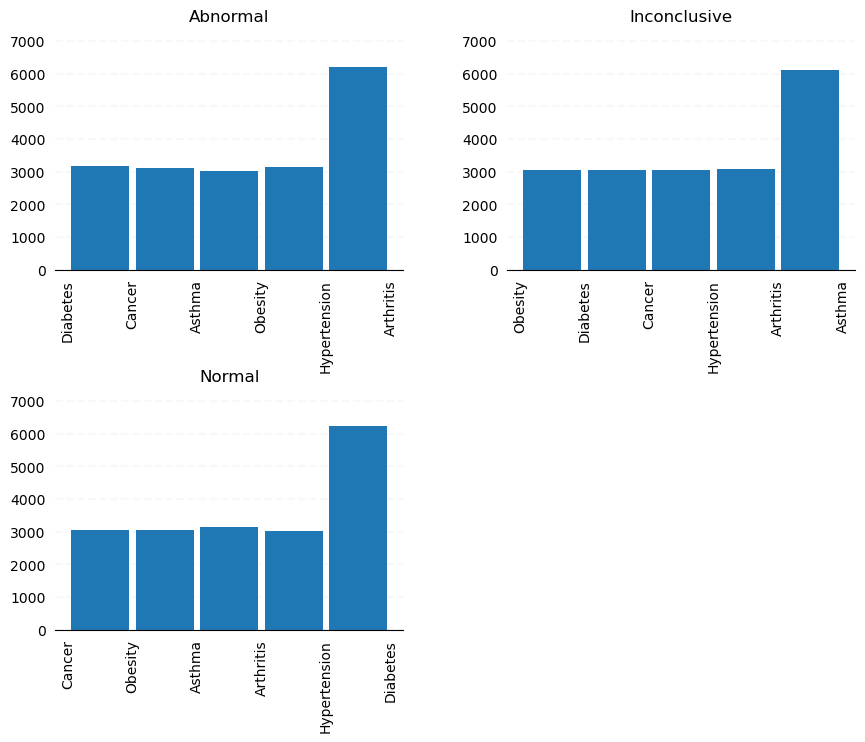

In [30]:
axes = df['Medical Condition'].hist(by=df['Test Results'], bins=5, grid=False, zorder=2, rwidth=0.9, xrot=90, figsize=(10,8))

for ax in axes.flatten():
    # Removes the edges of the chart
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Removes the ticks from the sides of the chart
    ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # Creates horizontal lines across background
    vals = ax.get_yticks()
    for tick in vals:
        ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

**Financial**

    What is the total billing amount by hospital?
    What is the distribution of billing amounts for urgent versus elective admissions?
    Is there a correlation between age and billing amount?
    Which insurance provider has the highest average billing amount?

In [31]:
df.groupby('Hospital')['Billing Amount'].sum()

Hospital
Abbott Inc                       38052.041917
Abbott Ltd                       29877.586483
Abbott Moore and Williams,       24799.596339
Abbott and Thompson, Sullivan    16738.569765
Abbott, Peters and Hoffman       37684.793727
                                     ...     
and Zimmerman Sons               32706.652625
and Zuniga Davis Carlson,        42867.041298
and Zuniga Francis Peterson,     33689.630726
and Zuniga Sons                  33950.170483
and Zuniga Thompson, Blake       22067.428763
Name: Billing Amount, Length: 39876, dtype: float64

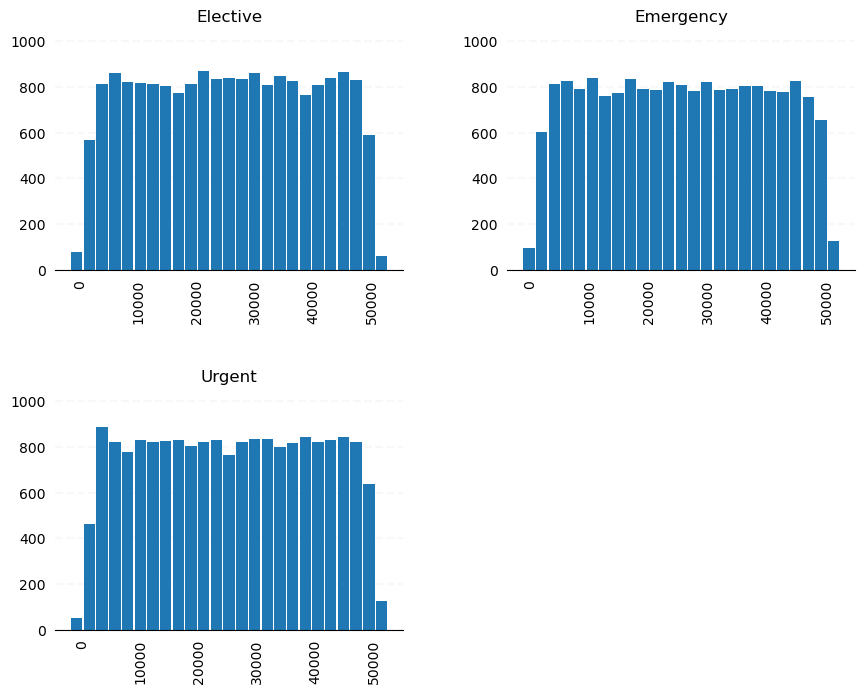

In [32]:
axes = df['Billing Amount'].hist(by=df['Admission Type'], bins=25, grid=False, zorder=2, rwidth=0.9, xrot=90, figsize=(10,8))

for ax in axes.flatten():
    # Removes the edges of the chart
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Removes the ticks from the sides of the chart
    ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # Creates horizontal lines across background
    vals = ax.get_yticks()
    for tick in vals:
        ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [33]:
df['Age'].corr(df['Billing Amount'])

-0.003831942118617664

In [34]:
df.groupby('Insurance Provider')['Billing Amount'].mean().sort_values(ascending=False).head(1)

Insurance Provider
Medicare    25615.990508
Name: Billing Amount, dtype: float64

**Medical Staff**

    Which doctor has treated the most patients?
    What is the average length of stay at each hospital?
    Which hospital has the highest number of urgent admissions?
    What is the average billing amount per doctor?

In [35]:
df['Doctor'].value_counts().sort_values(ascending=False).head(1)

Michael Smith    27
Name: Doctor, dtype: int64

In [36]:
df['date_difference'].mean()

15.50900900900901

In [37]:
df.groupby('Hospital')['Admission Type'].value_counts()

df.loc[df['Admission Type'] == 'Urgent'].groupby('Hospital')['Admission Type'].value_counts()

Hospital                    Admission Type
Abbott, Peters and Hoffman  Urgent            2
Abbott-Castillo             Urgent            1
Abbott-Ferrell              Urgent            1
Abbott-Jones                Urgent            1
Acevedo Ltd                 Urgent            3
                                             ..
and Young, Carpenter Henry  Urgent            1
and Young, Torres Figueroa  Urgent            2
and Young, White Adams      Urgent            1
and Yu Herrera, Harper      Urgent            2
and Zhang Hansen, Davis     Urgent            1
Name: Admission Type, Length: 14794, dtype: int64

In [38]:
df.groupby('Doctor')['Billing Amount'].mean()

Doctor
Aaron Acevedo      29047.276881
Aaron Adams        20162.255454
Aaron Aguilar       8091.811551
Aaron Alexander    22120.865185
Aaron Anderson     40326.058137
                       ...     
Zoe Khan           25569.200623
Zoe Knight         33600.996647
Zoe Nichols        34217.903828
Zoe Roberts        38594.424820
Zoe Wallace        22018.470927
Name: Billing Amount, Length: 40341, dtype: float64

**Insurance and Payments**

    How does billing vary by insurance provider?
    What is the total billing amount for each insurance provider?

In [39]:
df.groupby('Insurance Provider')['Billing Amount'].mean()

Insurance Provider
Aetna               25553.294506
Blue Cross          25613.011503
Cigna               25525.766314
Medicare            25615.990508
UnitedHealthcare    25389.172390
Name: Billing Amount, dtype: float64

In [40]:
df.groupby('Insurance Provider')['Billing Amount'].sum()

Insurance Provider
Aetna               2.788631e+08
Blue Cross          2.832543e+08
Cigna               2.871393e+08
Medicare            2.857208e+08
UnitedHealthcare    2.824545e+08
Name: Billing Amount, dtype: float64